Importing Libraris

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

Loading Dataset

In [2]:
df=pd.read_csv('medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Top 5 Rows:

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Last 5 Row:

In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


Checking all columns

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Checking data types of all parameters

In [6]:
# Checking no of rows and coulmns

df.shape

(1338, 7)

In [7]:
#Checking Datatypes 

df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
# Getting some information about data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# Checking Null Values :

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* Observation : There is no null value so no treatment needed

In [10]:
# Defining Columns as nominal data and ordinal data

In [11]:
df_visualization_nominal=df[['sex','children','smoker','region']].copy()
df_visualization_nominal.columns

Index(['sex', 'children', 'smoker', 'region'], dtype='object')

In [12]:
df_visualization_ordinal=df[["age","bmi"]].copy()
df_visualization_ordinal.columns

Index(['age', 'bmi'], dtype='object')

In [13]:
### For nominal data we draw countplot and for ordinal data we draw distribution plot ###

In [14]:
sns.set()                                                                  ## For showing grid lines in graph

COUNTPLOTS for Nominal data :

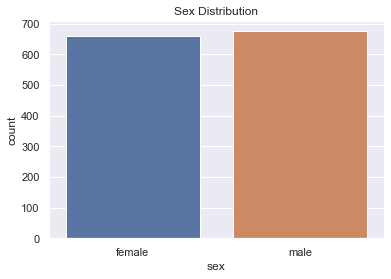

male      676
female    662
Name: sex, dtype: int64

In [15]:
# Gender Column

sns.countplot(x="sex",data=df_visualization_nominal)
plt.title("Sex Distribution")
plt.show()

df['sex'].value_counts()

* Observation : Male is more than Females

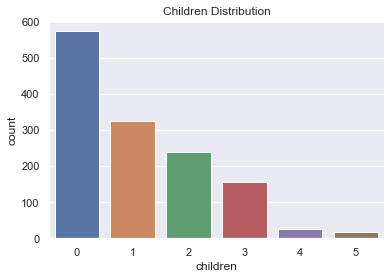

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [16]:
# Children Column

sns.countplot(x="children",data=df_visualization_nominal)
plt.title("Children Distribution")
plt.show()

df['children'].value_counts()

* Observation : No. of people having how many children shown

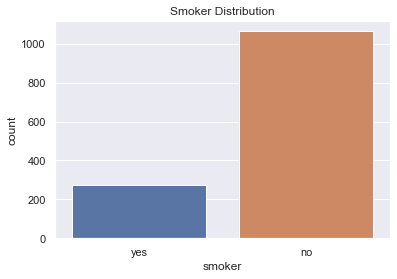

no     1064
yes     274
Name: smoker, dtype: int64

In [17]:
# Smoker Column

sns.countplot(x="smoker",data=df_visualization_nominal)
plt.title("Smoker Distribution")
plt.show()

df['smoker'].value_counts()

* Observation : Non-Smokers are more than smokers

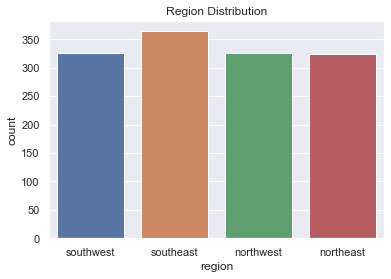

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [18]:
# Region Column

sns.countplot(x="region",data=df_visualization_nominal)
plt.title("Region Distribution")
plt.show()

df['region'].value_counts()

* Observation : No of people shown in which region how many people resides

DISTRIBUTIONPLOTS for Ordinal data :

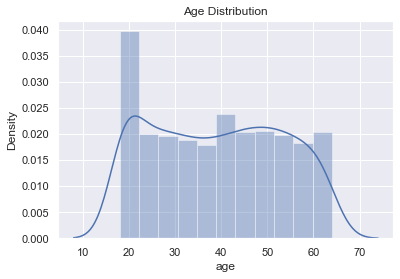

In [19]:
# Age Column

sns.distplot(df['age'])
plt.title("Age Distribution")
plt.show()

* Observation :Age is high for value around 20 and after 25-70 it is almost normal. More people are in range of 20,21 and 22.

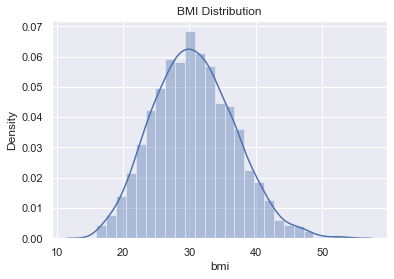

In [20]:
# Bmi Column

sns.distplot(df['bmi'])
plt.title("BMI Distribution")
plt.show()

* Observation :More values lies in mid range i.e. 30 and similar distribution on either sides of peak.

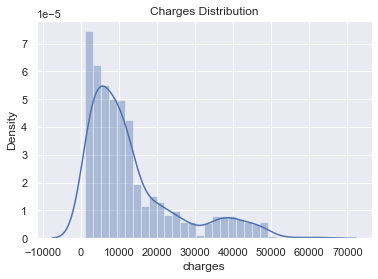

In [21]:
# Charges Column

sns.distplot(df['charges'])
plt.title("Charges Distribution")
plt.show()

* Observation : Mostly data distributed in range of dollar 10000 . Very little values goes around dollar 30k-40k.

# Encoding Categorical Features

In [22]:
# Encoding sex column
df.replace({'sex':{'male':0,'female':1}},inplace=True)

# Encoding smoker column
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)

# Encoding region column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


# Data Analysis and Visulization

Statistical measure of dataset :

In [23]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.795217,1.455904,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130888,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,1.000000,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,1.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,1.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


All statistical data of all rows shown for each parameters like mean, minimum, maximum , 25th percentile means how much value for each column are below 25th percentile ,similarly for 50th perecntile and 75th perecntile.

<AxesSubplot:xlabel='bmi', ylabel='charges'>

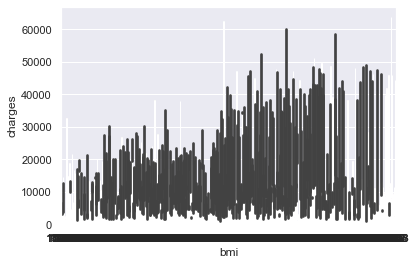

In [24]:
sns.barplot(x='bmi',y='charges',data=df)

# Correlation :

In [25]:
#Now we check correlation of input parameters with output "quality" :
#positively correlated : direct correlation
#negatively correlated : negative correlation

In [26]:
dfcor=df.corr()
dfcor

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,0.025019,0.005212,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,0.076185,0.016121,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,-0.003750,-0.261829,0.198341
children,0.042469,-0.017163,0.012759,1.000000,-0.007673,0.019257,0.067998
smoker,0.025019,0.076185,-0.003750,-0.007673,1.000000,0.053930,-0.787251
region,0.005212,0.016121,-0.261829,0.019257,0.053930,1.000000,-0.056993
charges,0.299008,-0.057292,0.198341,0.067998,-0.787251,-0.056993,1.000000


<AxesSubplot:>

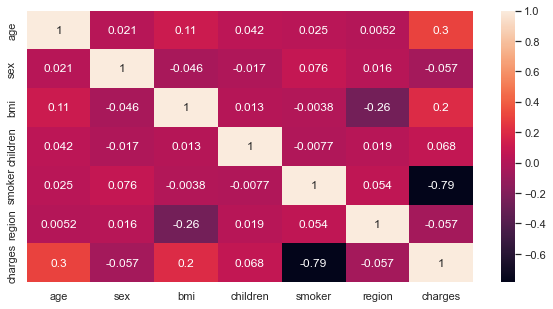

In [27]:
# For better understanding of correlation matrix between columns we draw heatmap :

plt.figure(figsize=(10,5))
sns.heatmap(dfcor,annot=True)

<AxesSubplot:>

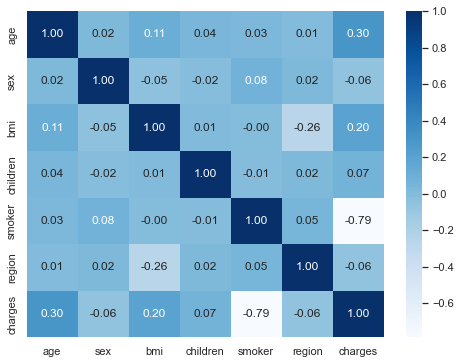

In [28]:
# We can change color also and decimal values place :

plt.figure(figsize=(8,6))
sns.heatmap(dfcor,annot=True,cmap='Blues',fmt='0.2f',cbar=True,square=False)

* Observation : We can directly see for Charges , Age is directly positively correlated as value = 0.30 and smoker is inverse as negative correlated value = - 0.79

# Data Preprocessing

In [29]:
# Separate data as x and y

In [30]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [31]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [32]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

# Outliers detection :

In [33]:
from scipy.stats import zscore
z=np.abs(zscore(x))
z

,age,sex,bmi,children,smoker,region
0,1.438764,1.010519,0.453320,0.908614,1.970587,0.403289
1,1.509965,0.989591,0.509621,0.078767,0.507463,1.287881
2,0.797954,0.989591,0.383307,1.580926,0.507463,1.287881
3,0.441948,0.989591,1.305531,0.908614,0.507463,1.365894
4,0.513149,0.989591,0.292556,0.908614,0.507463,1.365894
...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,0.507463,1.365894
1334,1.509965,1.010519,0.206139,0.908614,0.507463,0.481303
1335,1.509965,1.010519,1.014878,0.908614,0.507463,1.287881
1336,1.296362,1.010519,0.797813,0.908614,0.507463,0.403289


In [34]:
threshold=3
print(np.where(z>3))

(array([  32,   71,  116,  166,  413,  425,  438,  568,  640,  847,  877,
        932,  937,  969,  984, 1047, 1085, 1116, 1130, 1245, 1272, 1317],
      dtype=int64), array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2],
      dtype=int64))


In [35]:
# Removing outliers from x

df1=df[(z<3).all(axis=1)]
df1

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [36]:
#After outliers removal some rows are removed so check data loss :-

In [37]:
# % Data Loss

data_loss=(1338-1316)/1338*100
print(data_loss)

1.6442451420029895


We can proceed as very low data loss

In [38]:
#Again Split x and y as new df created after outlier removal

In [65]:
x=df1.iloc[:,0:-1]
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [66]:
y

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


# Skewness :

In [67]:
x.skew().sort_values(ascending=False)

children    0.740881
bmi         0.193564
age         0.049904
region      0.033820
sex         0.012172
smoker     -1.450367
dtype: float64

In [41]:
#Remove Skewness - apply power transformation

from sklearn.preprocessing import power_transform
x_new=power_transform(x,method='yeo-johnson')
x_new

array([[-1.52547382,  1.00609762, -0.41980326, -1.06741154, -1.95914147,
        -0.31581085],
       [-1.61684824, -0.99393934,  0.55577125,  0.32580599,  0.51042766,
        -1.37043083],
       [-0.76772801, -0.99393934,  0.43209483,  1.42086875,  0.51042766,
        -1.37043083],
       ...,
       [-1.61684824,  1.00609762,  1.03905968, -1.06741154,  0.51042766,
        -1.37043083],
       [-1.34765661,  1.00609762, -0.78929365, -1.06741154,  0.51042766,
        -0.31581085],
       [ 1.46012089,  1.00609762, -0.21897484, -1.06741154, -1.95914147,
         1.27609199]])

In [42]:
x1=pd.DataFrame(x_new,columns=x.columns)                                                #convert transformed data into DataFrame
x1.skew().sort_values(ascending=False)                                                  #again skewness checked

children    0.100350
sex         0.012172
bmi        -0.012546
age        -0.101915
region     -0.151105
smoker     -1.450367
dtype: float64

In [43]:
#Remove Skewness - apply power transformer

from sklearn.preprocessing import PowerTransformer 
trans=PowerTransformer(method='yeo-johnson')


In [45]:
x1[['smoker']]=trans.fit_transform(x1[['smoker']].values)
x1.skew().sort_values(ascending=False) 

children    0.100350
sex         0.012172
bmi        -0.012546
age        -0.101915
region     -0.151105
smoker     -1.450367
dtype: float64

* Observatin : Same result produces for both transformation as skewness in between -1 to 0.1.

# Feature Scaling :                                      

In [46]:
# Scaling increases the model performance to much extent, we get best result after scaling data

In [47]:
# Standard Scaling :

from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_st=st.fit_transform(x1)
x_st

array([[-1.52547382,  1.00609762, -0.41980326, -1.06741154, -1.95914147,
        -0.31581085],
       [-1.61684824, -0.99393934,  0.55577125,  0.32580599,  0.51042766,
        -1.37043083],
       [-0.76772801, -0.99393934,  0.43209483,  1.42086875,  0.51042766,
        -1.37043083],
       ...,
       [-1.61684824,  1.00609762,  1.03905968, -1.06741154,  0.51042766,
        -1.37043083],
       [-1.34765661,  1.00609762, -0.78929365, -1.06741154,  0.51042766,
        -0.31581085],
       [ 1.46012089,  1.00609762, -0.21897484, -1.06741154, -1.95914147,
         1.27609199]])

In [48]:
x=pd.DataFrame(x_st,columns=x.columns)                                   #convert scaled data into DataFrame

In [49]:
# Multicollinearity Check VIF Technique

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)
    
vif_calc()

   VIF Factor  features
0    1.022830       age
1    1.008627       sex
2    1.092165       bmi
3    1.008652  children
4    1.011157    smoker
5    1.079130    region


* Observation : As vif value < 5 so no multicollinearity present

# Train and Test Splitting :

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=3)

In [69]:
x.shape,x_train.shape,x_test.shape

((1316, 6), (921, 6), (395, 6))

# Modelling :

Metrics imported :

In [81]:
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

1) LINEAR REGRESSION

In [84]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)                                                          #fitting the data will train your model

LinearRegression()

Our Model is successfully trained , Lets perform prediction

In [97]:
pred_train_lr=lr.predict(x_train)
predlr=lr.predict(x_test)                                                       #predicted variable for testing

print('Training Accuracy is',r2_score(y_train,pred_train_lr))
print('Testing Accuracy is',r2_score(y_test,predlr))
print('Error:')
print('Mean Absolute Error:',mean_absolute_error(y_test,predlr))
print('Mean squared Error:',mean_squared_error(y_test,predlr))
print('Root Mean squared Error:',np.sqrt(mean_squared_error(y_test,predlr)))

Training Accuracy is 0.9661611005623476
Testing Accuracy is 0.9598255112505493
Error:
Mean Absolute Error: 608.3775815165219
Mean squared Error: 5608667.780525306
Root Mean squared Error: 2368.262608015696


In [117]:
from sklearn.model_selection import cross_val_score
cr_1=cross_val_score(lr,x,y,cv=6)
print("Cross Validation Score of Linear Regression model:-",cr_1.mean())
diff_1=r2_score(y_test,predlr)-cr_1.mean()
print("diff between r2 score and cross validation score is -",diff_1)

Cross Validation Score of Linear Regression model:- 0.9637628655077027
diff between r2 score and cross validation score is - -0.003937354257153469


# Regularization

In [103]:
from sklearn.linear_model import Lasso,Ridge                 #Alpha Value should be same for all regression

2) Lasso Regression

In [112]:
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)                                     #Fitting Training Model
ls_score_training=ls.score(x_train,y_train)
print((ls_score_training)*100)

96.61610237428174


In [113]:
pred_train_ls=ls.predict(x_train)
predls=ls.predict(x_test)                                   #predicted variable for testing

print('Training Accuracy is',r2_score(y_train,pred_train_ls))
print('Testing Accuracy is',r2_score(y_test,predls))
print('Error:')
print('Mean Absolute Error:',mean_absolute_error(y_test,predls))
print('Mean squared Error:',mean_squared_error(y_test,predls))
print('Root Mean squared Error:',np.sqrt(mean_squared_error(y_test,predls)))

Training Accuracy is 0.9661610237428174
Testing Accuracy is 0.9598254343329072
Error:
Mean Absolute Error: 608.3776755268187
Mean squared Error: 5608667.747295302
Root Mean squared Error: 2368.2626010000035


In [118]:
from sklearn.model_selection import cross_val_score
cr_2=cross_val_score(ls,x,y,cv=6)
print("Cross Validation Score of Lasso model:-",cr_2.mean())
diff_2=r2_score(y_test,predls)-cr_1.mean()
print("diff between r2 score and cross validation score is -",diff_2)

Cross Validation Score of Lasso model:- 0.9637627873928806
diff between r2 score and cross validation score is - -0.003937431174795503


3) Ridge Regression

In [119]:
rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)                                     #Fitting Training Model
rd_score_training=rd.score(x_train,y_train)
print((ls_score_training)*100)

96.61610237428174


In [120]:
pred_train_rd=rd.predict(x_train)
predrd=rd.predict(x_test)                                   #predicted variable for testing

print('Training Accuracy is',r2_score(y_train,pred_train_rd))
print('Testing Accuracy is',r2_score(y_test,predrd))
print('Error:')
print('Mean Absolute Error:',mean_absolute_error(y_test,predrd))
print('Mean squared Error:',mean_squared_error(y_test,predrd))
print('Root Mean squared Error:',np.sqrt(mean_squared_error(y_test,predrd)))

Training Accuracy is 0.9661611005622169
Testing Accuracy is 0.9598255153330337
Error:
Mean Absolute Error: 608.3777843952379
Mean squared Error: 5608667.210566158
Root Mean squared Error: 2368.2624876829336


In [121]:
cr_3=cross_val_score(rd,x,y,cv=6)
print("Cross Validation Score of Ridge model:-",cr_3.mean())
diff_3=r2_score(y_test,predrd)-cr_3.mean()
print("diff between r2 score and cross validation score is -",diff_3)

Cross Validation Score of Ridge model:- 0.963762865732834
diff between r2 score and cross validation score is - -0.003937350399800255


# Ensemble Technique

To make our model more perfect we try another method 
4) RandomForestRegressor

In [122]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [123]:
pred_train_rf=rf.predict(x_train)
predrf=rf.predict(x_test)                                                       #predicted variable for testing

print('Training Accuracy is',r2_score(y_train,pred_train_rf))
print('Testing Accuracy is',r2_score(y_test,predrf))
print('Error:')
print('Mean Absolute Error:',mean_absolute_error(y_test,predrf))
print('Mean squared Error:',mean_squared_error(y_test,predrf))
print('Root Mean squared Error:',np.sqrt(mean_squared_error(y_test,predrf)))

Training Accuracy is 0.976473155325306
Testing Accuracy is 0.8244291454962063
Error:
Mean Absolute Error: 411.6544942911395
Mean squared Error: 3807476.180407821
Root Mean squared Error: 1951.275526523054


In [124]:
cr_4=cross_val_score(rf,x,y,cv=6)
print("Cross Validation Score of Random Forest Regressor model:-",cr_4.mean())
diff_4=r2_score(y_test,predrf)-cr_4.mean()
print("diff between r2 score and cross validation score is -",diff_4)

Cross Validation Score of Random Forest Regressor model:- 0.8389592440822445
diff between r2 score and cross validation score is - -0.014530098586038265


In [130]:
result = pd.DataFrame({'Models':['Lr','ls','rd','rf'],
                       'r2_score':[r2_score(y_test,predlr)*100,
                                   r2_score(y_test,predls)*100,
                                   r2_score(y_test,predrd)*100,
                                   r2_score(y_test,predrf)*100],
                     'Difference of r2_score and cross-val':[diff_1,diff_2,diff_3,diff_4]})
result                                                                                   

,Models,r2_score,Difference of r2_score and cross-val
0,Lr,95.982551,-0.003937
1,ls,95.982543,-0.003937
2,rd,95.982552,-0.003937
3,rf,82.442915,-0.014530


# Save Model

In [136]:
import joblib

joblib.dump(lr,'medical_cost_prediction')

['medical_cost_prediction']

In [ ]:
model=joblib.load('medical_cost_prediction')

# Prediction Model

In [138]:
input_data=(56,1,39.82,1,0,11090)

# Changing data into numpy array
input_data_nparray=np.asarray(input_data)

# reshaping data as we are predicting label for only one instance
input_data_reshaped=input_data_nparray.reshape(1,-1)

prediction=model.predict(input_data_reshaped)
print(prediction)

[[ 5.60000000e+01  1.00000000e+00  3.98200000e+01  1.00000000e+00
  -1.27077561e-11  1.10900000e+04  2.84279126e+06]]
